# Import Stuff

In [1]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import plotly.offline as py
import plotly.graph_objs as go
import numpy as np
import seaborn as sns
py.init_notebook_mode(connected=True)
%matplotlib inline
%matplotlib notebook

Using TensorFlow backend.


In [2]:
data = pd.read_csv("merged_data.csv")
data.columns = ["unused","Time","Price",'Sentiment']

In [3]:
btc_trace = go.Scatter(x=data['Time'], y=data['Price'], name= 'Price')
py.iplot([btc_trace])

In [4]:
sent_trace = go.Scatter(x=data['Time'], y=data['Sentiment'], name= 'Sentiment')
py.iplot([sent_trace])

In [5]:
datag = data[['Price','Sentiment']].groupby(data['Time']).mean()

## Training a simple random model:

In [6]:
from sklearn.preprocessing import MinMaxScaler
values = datag['Price'].values.reshape(-1,1)
sentiment = datag['Sentiment'].values.reshape(-1,1)
values = values.astype('float32')
sentiment = sentiment.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

In [7]:
train_size = int(len(scaled) * 0.7)
test_size = len(scaled) - train_size
train, test = scaled[0:train_size,:], scaled[train_size:len(scaled),:]
print(len(train), len(test))
split = train_size

448 193


In [8]:
def create_dataset(dataset, look_back, sentiment, sent=False):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        if i >= look_back:
            a = dataset[i-look_back:i+1, 0]
            a = a.tolist()
            if(sent==True):
                a.append(sentiment[i].tolist()[0])
            dataX.append(a)
            dataY.append(dataset[i + look_back, 0])
    #print(len(dataY))
    return np.array(dataX), np.array(dataY)

In [9]:
look_back = 2
trainX, trainY = create_dataset(train, look_back, sentiment[0:train_size],sent=True)
testX, testY = create_dataset(test, look_back, sentiment[train_size:len(scaled)], sent=True)

In [10]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [11]:
trainX[0:10]

array([[[0.        , 0.0013782 , 0.00260171, 0.30490166]],

       [[0.0013782 , 0.00260171, 0.00388147, 0.30863521]],

       [[0.00260171, 0.00388147, 0.00305174, 0.32126829]],

       [[0.00388147, 0.00305174, 0.0045987 , 0.32126829]],

       [[0.00305174, 0.0045987 , 0.00551281, 0.32126829]],

       [[0.0045987 , 0.00551281, 0.00541438, 0.21771783]],

       [[0.00551281, 0.00541438, 0.00656756, 0.21771783]],

       [[0.00541438, 0.00656756, 0.00843799, 0.29100022]],

       [[0.00656756, 0.00843799, 0.00838173, 0.29100022]],

       [[0.00843799, 0.00838173, 0.00777701, 0.29100022]]])

In [12]:
model = Sequential()
model.add(LSTM(100, input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(100))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
history = model.fit(trainX, trainY, epochs=300, batch_size=100, validation_data=(testX, testY), verbose=1, shuffle=False)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 444 samples, validate on 189 samples
Epoch 1/300
444/444 [==============================] - 2s 5ms/step - loss: nan - val_loss: nan
Epoch 2/300
444/444 [==============================] - 0s 151us/step - loss: nan - val_loss: nan
Epoch 3/300
444/444 [==============================] - 0s 150us/step - loss: nan - val_loss: nan
Epoch 4/300
444/444 [==============================] - 0s 179us/step - loss: nan - val_loss: nan
Epoch 5/300
444/444 [==============================] - 0s 152us/step - loss: nan - val_loss: nan
Epoch 6/300
444/444 [==============================] - 0s 195us/step - loss: nan - val_loss: nan
Epoch 7/300
444/444 [==============================] - 0s 207us/step - loss: nan - val_loss: nan
Epoch 8/300
444/444 [==============================] - 0s 163us/step - loss: nan - val_loss: nan
Epoch 9/300
444/444 [==============================] - 0s 16

444/444 [==============================] - 0s 153us/step - loss: nan - val_loss: nan
Epoch 79/300
444/444 [==============================] - 0s 172us/step - loss: nan - val_loss: nan
Epoch 80/300
444/444 [==============================] - 0s 265us/step - loss: nan - val_loss: nan
Epoch 81/300
444/444 [==============================] - 0s 210us/step - loss: nan - val_loss: nan
Epoch 82/300
444/444 [==============================] - 0s 189us/step - loss: nan - val_loss: nan
Epoch 83/300
444/444 [==============================] - 0s 176us/step - loss: nan - val_loss: nan
Epoch 84/300
444/444 [==============================] - 0s 196us/step - loss: nan - val_loss: nan
Epoch 85/300
444/444 [==============================] - 0s 244us/step - loss: nan - val_loss: nan
Epoch 86/300
444/444 [==============================] - 0s 154us/step - loss: nan - val_loss: nan
Epoch 87/300
444/444 [==============================] - 0s 203us/step - loss: nan - val_loss: nan
Epoch 88/300
444/444 [===========

444/444 [==============================] - 0s 170us/step - loss: nan - val_loss: nan
Epoch 162/300
444/444 [==============================] - 0s 160us/step - loss: nan - val_loss: nan
Epoch 163/300
444/444 [==============================] - 0s 155us/step - loss: nan - val_loss: nan
Epoch 164/300
444/444 [==============================] - 0s 156us/step - loss: nan - val_loss: nan
Epoch 165/300
444/444 [==============================] - 0s 247us/step - loss: nan - val_loss: nan
Epoch 166/300
444/444 [==============================] - 0s 131us/step - loss: nan - val_loss: nan
Epoch 167/300
444/444 [==============================] - 0s 221us/step - loss: nan - val_loss: nan
Epoch 168/300
444/444 [==============================] - 0s 364us/step - loss: nan - val_loss: nan
Epoch 169/300
444/444 [==============================] - 0s 164us/step - loss: nan - val_loss: nan
Epoch 170/300
444/444 [==============================] - 0s 239us/step - loss: nan - val_loss: nan
Epoch 171/300
444/444 [=

Epoch 244/300
444/444 [==============================] - 0s 165us/step - loss: nan - val_loss: nan
Epoch 245/300
444/444 [==============================] - 0s 177us/step - loss: nan - val_loss: nan
Epoch 246/300
444/444 [==============================] - 0s 145us/step - loss: nan - val_loss: nan
Epoch 247/300
444/444 [==============================] - 0s 122us/step - loss: nan - val_loss: nan
Epoch 248/300
444/444 [==============================] - 0s 201us/step - loss: nan - val_loss: nan
Epoch 249/300
444/444 [==============================] - 0s 170us/step - loss: nan - val_loss: nan
Epoch 250/300
444/444 [==============================] - 0s 133us/step - loss: nan - val_loss: nan
Epoch 251/300
444/444 [==============================] - 0s 123us/step - loss: nan - val_loss: nan
Epoch 252/300
444/444 [==============================] - 0s 168us/step - loss: nan - val_loss: nan
Epoch 253/300
444/444 [==============================] - 0s 194us/step - loss: nan - val_loss: nan
Epoch 254/

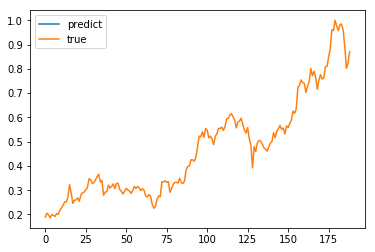

In [13]:
yhat = model.predict(testX)
pyplot.plot(yhat, label='predict')
pyplot.plot(testY, label='true')
pyplot.legend()
pyplot.show()